In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
review_df_full = pd.read_csv("/content/Reviews.csv")

# What is in the data-file (shape and information in the columns)?
print(review_df_full.shape)
review_df_full.head()

(60145, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
review_df = review_df_full.head(1000)


some_random_review = review_df['Text'].values[50]
print(some_random_review)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
!python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))"

2023-11-21 07:14:58.809015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 07:14:58.809101: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 07:14:58.809153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 07:14:58.824005: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 07:15:00.261791: W tensorflow/compiler/

In [ ]:
! pip install transformers

In [ ]:
import transformers
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"

2023-11-21 07:16:07.595708: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 07:16:07.595775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 07:16:07.595814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 07:16:08.874924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revisi

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Define model (pre-trained model provided by Hugging-Face for sentiment analysis)
Pretrained_Model = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(Pretrained_Model)
model     = AutoModelForSequenceClassification.from_pretrained(Pretrained_Model)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
tokenizer(some_random_review, return_tensors='pt')

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
encoded_text = tokenizer(some_random_review, return_tensors='pt')
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
senti_scores = output[0][0].detach().numpy()
senti_scores

array([ 3.143629  , -0.71066874, -2.6558962 ], dtype=float32)

In [ ]:
senti_scores = softmax(senti_scores)
senti_scores
senti_scores_dict = {
    'roberta_neg' : senti_scores[0],
    'roberta_neu' : senti_scores[1],
    'roberta_pos' : senti_scores[2]
}
print(senti_scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [ ]:
def sentiment_intensity_score_roberta(text1):
    encoded_text = tokenizer(text1, return_tensors='pt')
    output       = model(**encoded_text)
    senti_scores = output[0][0].detach().numpy()
    senti_scores = softmax(senti_scores)
    senti_scores_dict = {
        'roberta_neg' : senti_scores[0],
        'roberta_neu' : senti_scores[1],
        'roberta_pos' : senti_scores[2]
    }
    return senti_scores_dict

sentiment_intensity = sentiment_intensity_score_roberta(some_random_review)
display(sentiment_intensity)

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687476,
 'roberta_pos': 0.002957372}

In [ ]:
nltk.download('vader_lexicon',download_dir='/content')


[nltk_data] Downloading package vader_lexicon to /content...


True

In [ ]:
import nltk
from tqdm.notebook import tqdm # To track the progress:

from nltk.sentiment import SentimentIntensityAnalyzer
si_analizer = SentimentIntensityAnalyzer()
si_analizer


both_results = {}
for i, each_row in tqdm( review_df.iterrows(), total=len(review_df) ):
    try:
        review_text = each_row['Text']
        cid         = each_row['Id']

        # 1: VADER Result
        vader_result = si_analizer.polarity_scores(review_text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # 2: Roberta Result
        roberta_result = sentiment_intensity_score_roberta(review_text)

        # Both results
        both_scores = {**vader_result_rename, **roberta_result}
        both_results[cid] = both_scores

    except RuntimeError: # Error: If the text is big or NOT Processable

        print(f'Error for id {cid}')


  0%|          | 0/1000 [00:00<?, ?it/s]

Error for id 83
Error for id 187
Error for id 529
Error for id 540
Error for id 746
Error for id 863


In [ ]:
final_results_df = pd.DataFrame(both_results).T
final_results_df = final_results_df.reset_index().rename(columns={'index': 'Id'})
final_results_df = final_results_df.merge(review_df, how='left')


final_results_df.head(5)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Robetra: Sentiment-Intensity-Scores of the reviews (Compound-score)')

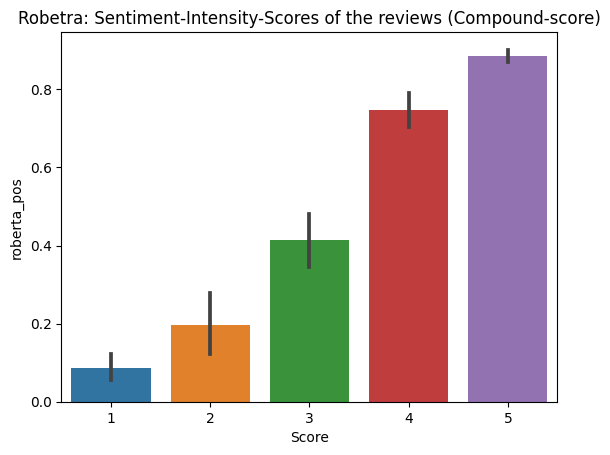

In [ ]:
ax = sns.barplot(data=final_results_df, x = "Score", y='roberta_pos')
ax.set_title('Robetra: Sentiment-Intensity-Scores of the reviews (Compound-score)')

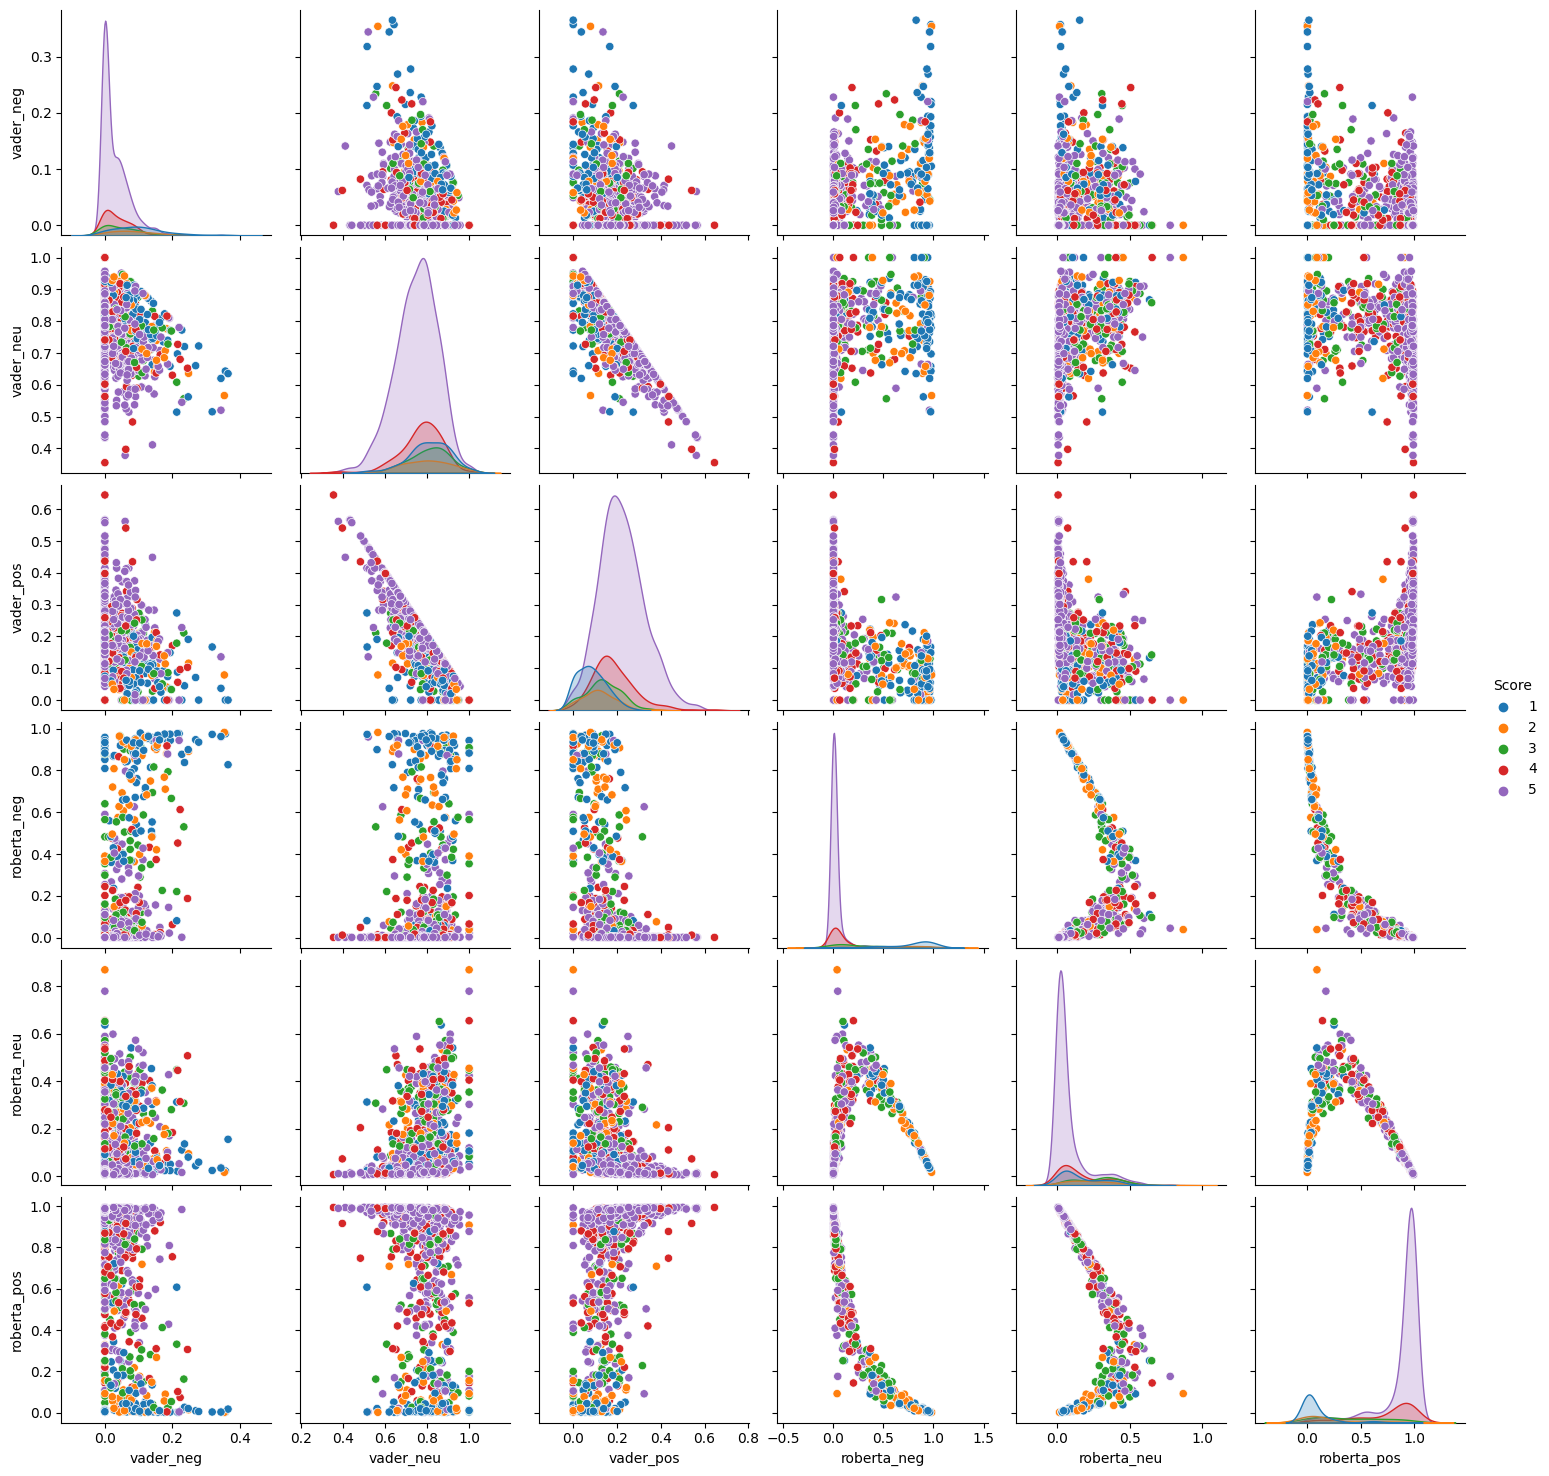

In [ ]:
sns.pairplot(data=final_results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10'
            )

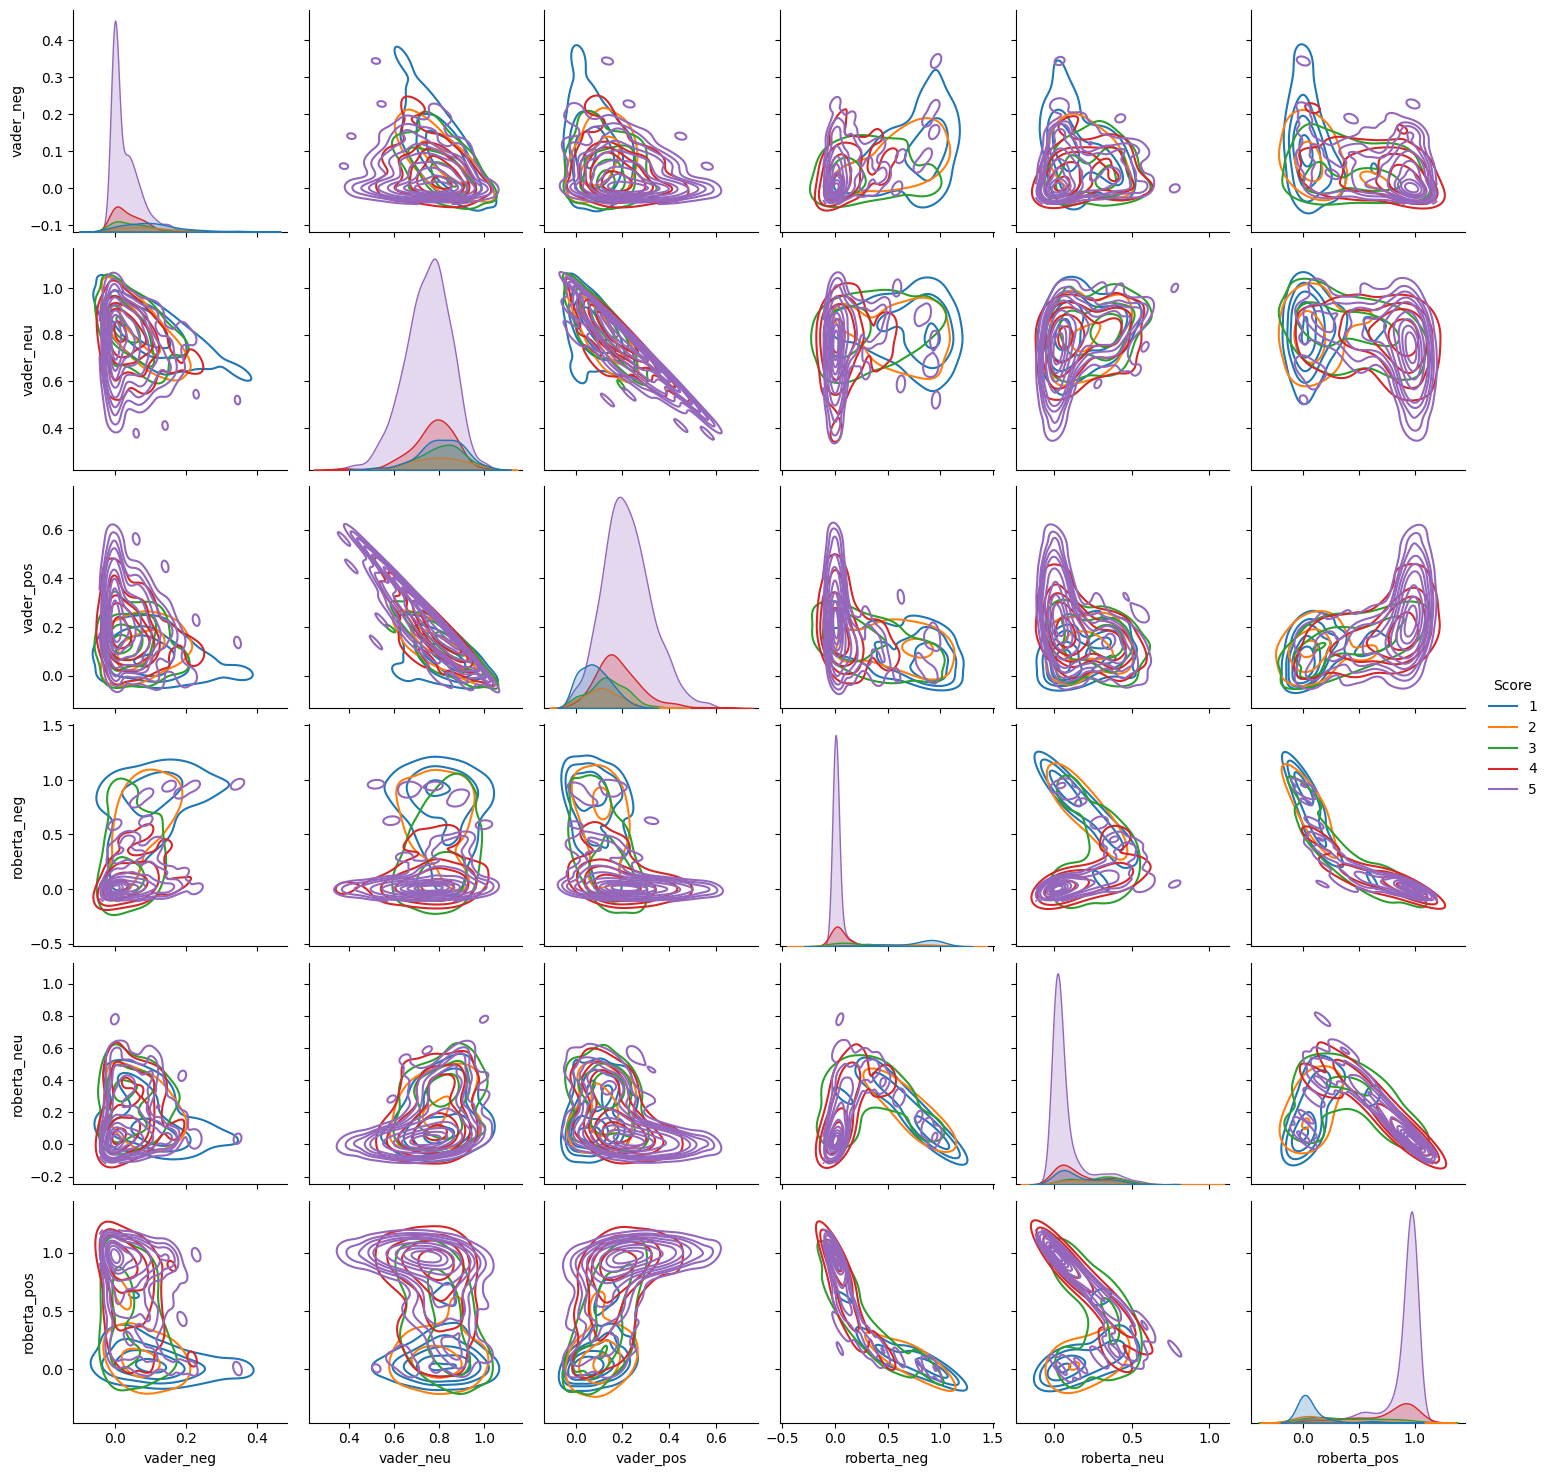

In [ ]:
sns.pairplot(data=final_results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             kind="kde",
             palette='tab10'
            )

In [ ]:
display(final_results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0])

display(final_results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0])

display(final_results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0])

display(final_results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0])

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
from transformers import pipeline

new_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
new_pipeline("What the hell!")

[{'label': 'NEGATIVE', 'score': 0.995294988155365}]

In [ ]:
new_pipeline("You don't seem good, what happened?")

[{'label': 'NEGATIVE', 'score': 0.9997561573982239}]